In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/yahoo_stock.csv')

# Display first few rows
print(df.head())

# Get info about the dataset
print(df.info())




         Date         High          Low         Open        Close  \
0  2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1  2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2  2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3  2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4  2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  
0  3.587980e+09  2086.590088  
1  3.884930e+09  2089.139893  
2  2.852940e+09  2088.870117  
3  2.852940e+09  2088.870117  
4  1.466840e+09  2090.110107  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume  

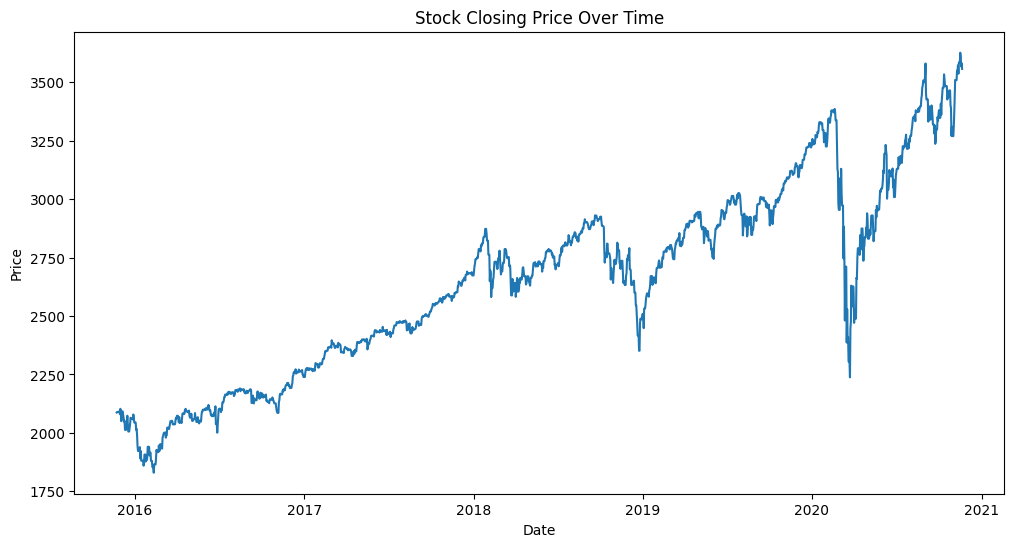

In [2]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Set date as index
df.set_index('Date', inplace=True)

# Visualize the closing price
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df.fillna(method='ffill', inplace=True)


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


/tmp/ipython-input-3-308270829.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [4]:
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Weekday'] = df.index.weekday


In [5]:
# 80% for training, 20% for testing
split = int(len(df) * 0.8)
train = df.iloc[:split]
test = df.iloc[split:]


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['Close'], forecast)
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")


MAE: 228.10, MSE: 77620.69, RMSE: 278.60
